In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# **Loading CIFAR-10 Dataset for Training and Testing and Visualizing the Data**

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


**Printing the shapes**

In [ ]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3) y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3) y_test shape: (10000, 1)


In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# print head
print("----------- Train Data -----------")
print(x_train[:1])
print("----------- Test Data -----------")
print(x_test[:1])

----------- Train Data -----------
[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.7058

## **Visualizing Data**

**1.   List item**

**2.   List item**



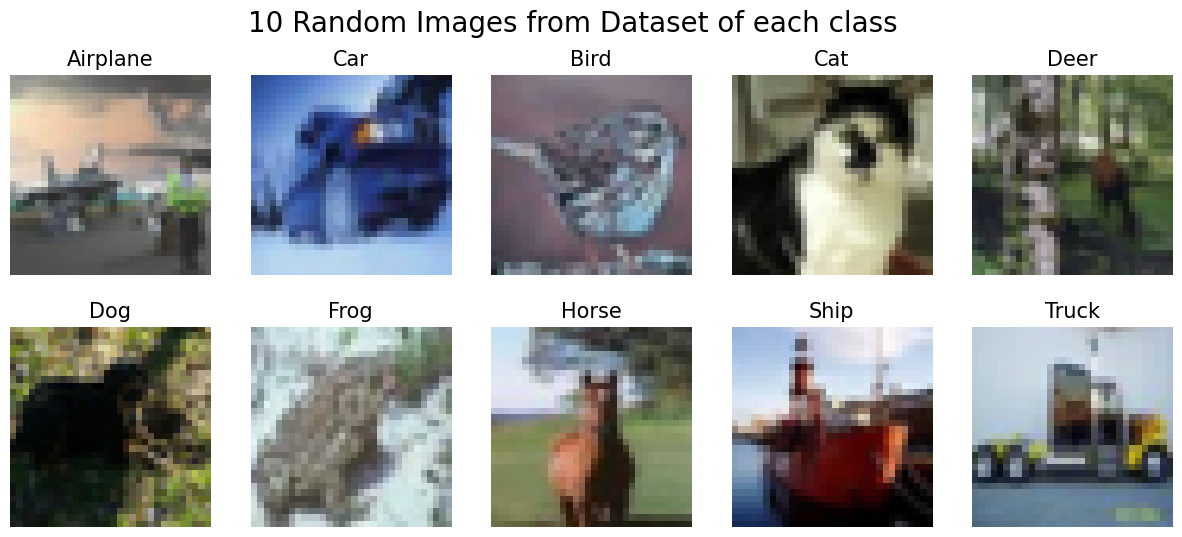

In [ ]:
data_dict = {0 : "Airplane",
             1 : "Car",
             2 : "Bird",
             3 : "Cat",
             4 : "Deer",
             5 : "Dog",
             6 : "Frog",
             7 : "Horse",
             8 : "Ship",
             9 : "Truck",
            }

def get_10_random_images():
  d = {}
  while len(d.keys()) < 10:
        idx = random.randint(0, len(y_train)-1)
        if y_train[idx][0] not in d.keys():
            d[y_train[idx][0]] = idx
  return d

d = get_10_random_images()
rows= 2
cols=5
fig,axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(x_train[d[i-1]])
    axes[i-1].axis('off')
    axes[i-1].set_title(data_dict[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 20)
plt.show()



# **Model1: Applying Two CNN Layers To Classify Data**#


In [ ]:
# model = Sequential([
#     Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3)),
#     MaxPooling2D((2,2)),

#     Conv2D(32, (3, 3), activation = 'relu'),
#     MaxPooling2D((2,2)),

#     Flatten(),
#     Dense(64, activation = 'relu'),
#     Dense(1, activation = 'sigmoid')
# ])

In [ ]:
# model = Sequential()

# model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (32, 32, 3)))
# model.add(MaxPooling2D((2,2)))

# model.add(Conv2D(32, (3,3), activation = 'relu'))
# model.add(MaxPooling2D((2,2)))

# model.add( Flatten())
# model.add(Dense(64, activation = 'relu'))
# model.add(Dense(1, activation= 'sigmoid'))

model = Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_126 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_63 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_127 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_64 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_128 (Conv2D)         (None, 4, 4, 64)          36928     
                                                                 
 flatten_21 (Flatten)        (None, 1024)            

In [ ]:
model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.fit(x_train, y_train, epochs=25,validation_data=(x_test, y_test))

Epoch 1/25
1563/1563 [==============================] - 81s 51ms/step - loss: 1.5079 - accuracy: 0.4502 - val_loss: 1.2524 - val_accuracy: 0.5439
Epoch 2/25
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1554 - accuracy: 0.5896 - val_loss: 1.0707 - val_accuracy: 0.6285
Epoch 3/25
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0064 - accuracy: 0.6468 - val_loss: 0.9823 - val_accuracy: 0.6559
Epoch 4/25
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9116 - accuracy: 0.6803 - val_loss: 0.9404 - val_accuracy: 0.6761
Epoch 5/25
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8394 - accuracy: 0.7051 - val_loss: 0.9711 - val_accuracy: 0.6670
Epoch 6/25
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7817 - accuracy: 0.7259 - val_loss: 0.8859 - val_accuracy: 0.6967
Epoch 7/25
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7268 - accuracy: 0.7445 - val_loss: 0.9344 -

# **Model2: Enhancing CNN for by ading Dropout Layer**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # Added another convolutional layer
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 2, 2, 128)        

In [ ]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.fit(x_train, y_train, epochs=15,validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 72s 46ms/step - loss: 0.4630 - accuracy: 0.8399 - val_loss: 0.8856 - val_accuracy: 0.7293
Epoch 2/15
1563/1563 [==============================] - 73s 47ms/step - loss: 0.4561 - accuracy: 0.8411 - val_loss: 0.9014 - val_accuracy: 0.7298
Epoch 3/15
1563/1563 [==============================] - 73s 47ms/step - loss: 0.4420 - accuracy: 0.8463 - val_loss: 0.8689 - val_accuracy: 0.7268
Epoch 4/15
1563/1563 [==============================] - 75s 48ms/step - loss: 0.4306 - accuracy: 0.8497 - val_loss: 0.9238 - val_accuracy: 0.7249
Epoch 5/15
1563/1563 [==============================] - 74s 47ms/step - loss: 0.4300 - accuracy: 0.8511 - val_loss: 0.9561 - val_accuracy: 0.7105
Epoch 6/15
1563/1563 [==============================] - 74s 47ms/step - loss: 0.4172 - accuracy: 0.8562 - val_loss: 0.9733 - val_accuracy: 0.7154
Epoch 7/15
1563/1563 [==============================] - 75s 48ms/step - loss: 0.4039 - accuracy: 0.8589 - val_loss: 0.9376 -

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 1.0188 - accuracy: 0.7202


[1.0187655687332153, 0.7202000021934509]

# **Model3:  Applying Four-Layer CNN with Regularization and Batch Normalization**


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import keras
from keras import regularizers
y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)
weight_decay = 1e-4
input_shape = x_train.shape[1:]

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', input_shape = input_shape, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))



model.add(Flatten())

model.add(Dense(units = 10, activation = 'softmax'))



In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_129 (Conv2D)         (None, 32, 32, 32)        896       
                                                                 
 activation_126 (Activation  (None, 32, 32, 32)        0         
 )                                                               
                                                                 
 batch_normalization_126 (B  (None, 32, 32, 32)        128       
 atchNormalization)                                              
                                                                 
 conv2d_130 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 activation_127 (Activation  (None, 32, 32, 32)        0         
 )                                                               
                                                     

In [ ]:
from tensorflow.keras.optimizers import legacy

from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, verbose=1, min_delta=0.0001)

model.compile(
    loss='categorical_crossentropy',
    optimizer=legacy.RMSprop(learning_rate=0.001, decay=1e-6),
    metrics=['accuracy']
)

epochs_hist = model.fit(x_train, y_train_cat, batch_size=64, epochs=50, validation_split=0.2, shuffle=True, callbacks=[early_stopping, reduce_lr])
model.save("/content/drive/My Drive/Model.h6")


Epoch 1/50
625/625 [==============================] - 20s 14ms/step - loss: 1.8744 - accuracy: 0.4505 - val_loss: 1.2811 - val_accuracy: 0.5918 - lr: 0.0010
Epoch 2/50
625/625 [==============================] - 8s 13ms/step - loss: 1.2653 - accuracy: 0.6226 - val_loss: 1.1811 - val_accuracy: 0.6410 - lr: 0.0010
Epoch 3/50
625/625 [==============================] - 8s 13ms/step - loss: 1.0550 - accuracy: 0.6812 - val_loss: 1.0202 - val_accuracy: 0.6919 - lr: 0.0010
Epoch 4/50
625/625 [==============================] - 8s 13ms/step - loss: 0.9248 - accuracy: 0.7165 - val_loss: 0.9993 - val_accuracy: 0.6938 - lr: 0.0010
Epoch 5/50
625/625 [==============================] - 8s 13ms/step - loss: 0.8297 - accuracy: 0.7441 - val_loss: 1.0077 - val_accuracy: 0.6932 - lr: 0.0010
Epoch 6/50
625/625 [==============================] - 8s 13ms/step - loss: 0.7593 - accuracy: 0.7717 - val_loss: 0.8205 - val_accuracy: 0.7515 - lr: 0.0010
Epoch 7/50
625/625 [==============================] - 9s 14ms/s

# **Accuracy Plot**

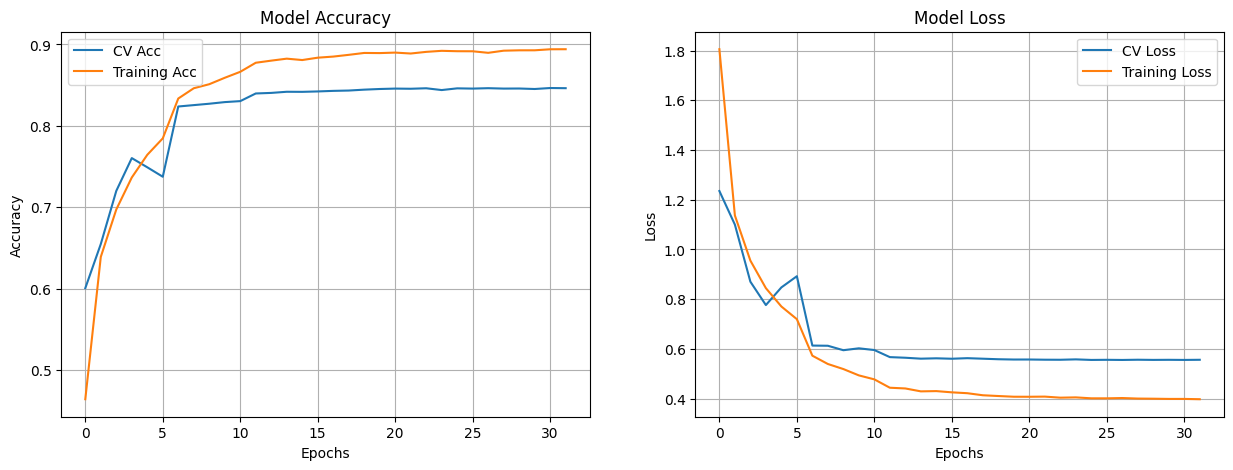

In [ ]:
from tensorflow.keras.models import load_model

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_hist.history['val_accuracy'], label = 'CV Acc')
plt.plot(epochs_hist.history['accuracy'], label = 'Training Acc')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_hist.history['val_loss'], label = 'CV Loss')
plt.plot(epochs_hist.history['loss'], label = 'Training Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

**Evaluating Model 3 on Tsting Set**

In [ ]:
from tensorflow.keras.models import load_model

loadedmodel = load_model("/content/drive/My Drive/Model.h6")
loadedmodel.evaluate(x_test, y_test_cat, batch_size=128, verbose=1)

79/79 [==============================] - 8s 9ms/step - loss: 0.5750 - accuracy: 0.8416


[0.5750362277030945, 0.8416000008583069]

# **Fine-tuning Model 3**

Training with hyperparameters: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.01, 'optimizer': 'rmsprop'}
Training with hyperparameters: {'batch_size': 32, 'epochs': 10, 'learning_rate': 0.001, 'optimizer': 'adam'}
Training with hyperparameters: {'batch_size': 64, 'epochs': 10, 'learning_rate': 0.01, 'optimizer': 'rmsprop'}
Training with hyperparameters: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'adam'}
Training with hyperparameters: {'batch_size': 64, 'epochs': 20, 'learning_rate': 0.01, 'optimizer': 'rmsprop'}


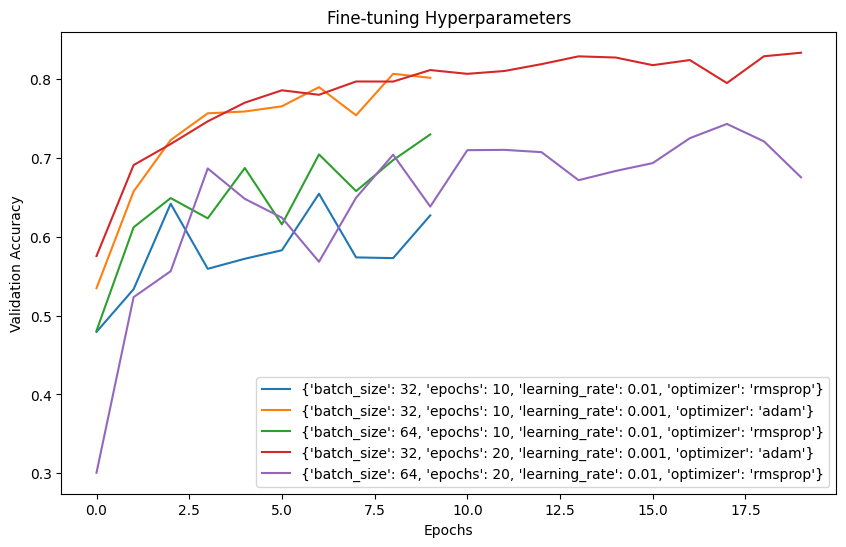

In [ ]:
from keras.optimizers import Adam
from sklearn.model_selection import ParameterGrid
from keras.models import Sequential
from keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Flatten, Dense
from keras import regularizers
import matplotlib.pyplot as plt

# Define hyperparameter grid with reduced variations
hyperparameters = {
    'learning_rate': [0.001, 0.01],
    'batch_size': [32, 64],
    'epochs': [10, 20],
    'optimizer': ['adam', 'rmsprop']
}

# Randomly select combinations
random.seed(42)  # Set seed for reproducibility
num_combinations = 5  # Choose the number of combinations to try

selected_combinations = random.sample(list(ParameterGrid(hyperparameters)), num_combinations)

results = {}

for params in selected_combinations:
    print("Training with hyperparameters:", params)
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=input_shape, kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.2))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.3))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Activation('elu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.4))

    model.add(Flatten())

    model.add(Dense(units=10, activation='softmax'))

    # Compile the model with the given hyperparameters
    if params['optimizer'] == 'adam':
        optimizer = Adam(learning_rate=params['learning_rate'])
    else:
        optimizer = legacy.RMSprop(learning_rate=params['learning_rate'], decay=1e-6)

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train_cat,
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        validation_split=0.2,
                        shuffle=True,
                        verbose=0)  # Set verbose to 0 for less output

    # Store performance metrics
    results[str(params)] = history.history

# Plot performance as a function of the chosen hyperparameters
plt.figure(figsize=(10, 6))
for params, result in results.items():
    plt.plot(result['val_accuracy'], label=str(params))
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Fine-tuning Hyperparameters')
plt.show()


# **Running Fine-tuned Model**

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
# Adjusted factor and patience for a more conservative learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, min_delta=0.0001)

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.01),  # Updated learning rate
    metrics=['accuracy']
)

# Keep the batch size and epochs as previously set
epochs_hist = model.fit(x_train, y_train_cat, batch_size=32, epochs=40, validation_split=0.2, shuffle=True, callbacks=[early_stopping, reduce_lr])

# Ensure you have the right path for saving the model
model.save("/content/drive/My Drive/Model.h5")


Epoch 1/40
1250/1250 [==============================] - 14s 9ms/step - loss: 2.3529 - accuracy: 0.3935 - val_loss: 2.0722 - val_accuracy: 0.3581 - lr: 0.0100
Epoch 2/40
1250/1250 [==============================] - 12s 9ms/step - loss: 1.5765 - accuracy: 0.5397 - val_loss: 2.5303 - val_accuracy: 0.2986 - lr: 0.0100
Epoch 3/40
1250/1250 [==============================] - ETA: 0s - loss: 1.4747 - accuracy: 0.5846
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
1250/1250 [==============================] - 12s 9ms/step - loss: 1.4747 - accuracy: 0.5846 - val_loss: 3.8710 - val_accuracy: 0.1862 - lr: 0.0100
Epoch 4/40
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1952 - accuracy: 0.6592 - val_loss: 4.9667 - val_accuracy: 0.1517 - lr: 0.0050
Epoch 5/40
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1257 - accuracy: 0.6780 - val_loss: 1.2335 - val_accuracy: 0.6396 - lr: 0.0050
Epoch 6/40
1250/1250 [==========================

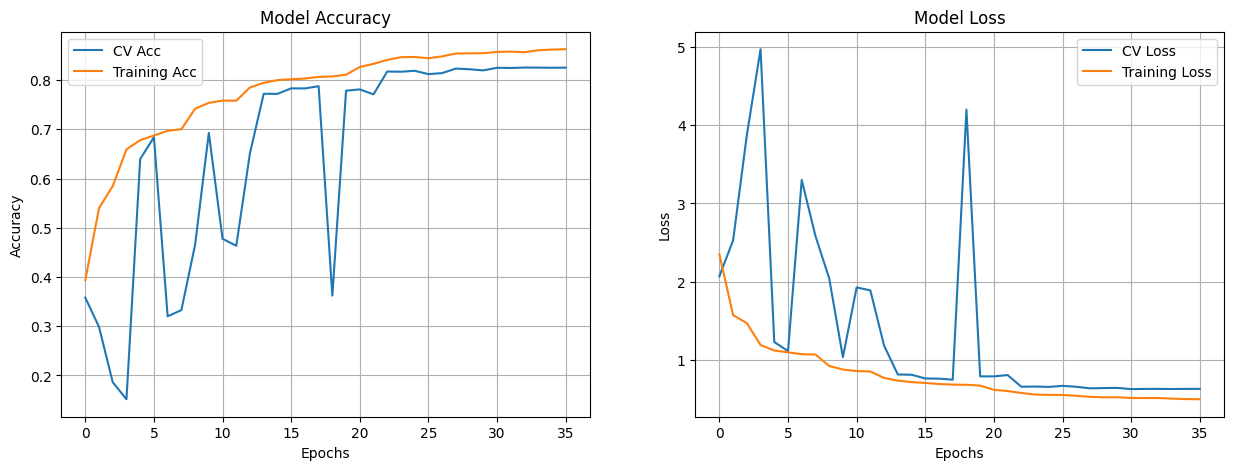

In [ ]:
from tensorflow.keras.models import load_model

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_hist.history['val_accuracy'], label = 'CV Acc')
plt.plot(epochs_hist.history['accuracy'], label = 'Training Acc')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_hist.history['val_loss'], label = 'CV Loss')
plt.plot(epochs_hist.history['loss'], label = 'Training Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving
# Adjusted factor and patience for a more conservative learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, min_delta=0.0001)

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.01),  # Updated learning rate
    metrics=['accuracy']
)

# Keep the batch size and epochs as previously set
epochs_hist = model.fit(x_train, y_train_cat, batch_size=32, epochs=40, validation_split=0.2, shuffle=True, callbacks=[early_stopping, reduce_lr])

# Ensure you have the right path for saving the model
model.save("/content/drive/My Drive/Model.h5")


Epoch 1/40
1250/1250 [==============================] - 15s 9ms/step - loss: 1.3852 - accuracy: 0.6305 - val_loss: 1.8402 - val_accuracy: 0.4856 - lr: 0.0100
Epoch 2/40
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4106 - accuracy: 0.6435 - val_loss: 4.9969 - val_accuracy: 0.2062 - lr: 0.0100
Epoch 3/40
1244/1250 [============================>.] - ETA: 0s - loss: 1.4043 - accuracy: 0.6457
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4039 - accuracy: 0.6458 - val_loss: 3.4889 - val_accuracy: 0.2522 - lr: 0.0100
Epoch 4/40
1250/1250 [==============================] - 11s 9ms/step - loss: 1.1337 - accuracy: 0.7081 - val_loss: 1.1784 - val_accuracy: 0.6802 - lr: 0.0050
Epoch 5/40
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0549 - accuracy: 0.7193 - val_loss: 1.5543 - val_accuracy: 0.5540 - lr: 0.0050
Epoch 6/40
1247/1250 [==========================

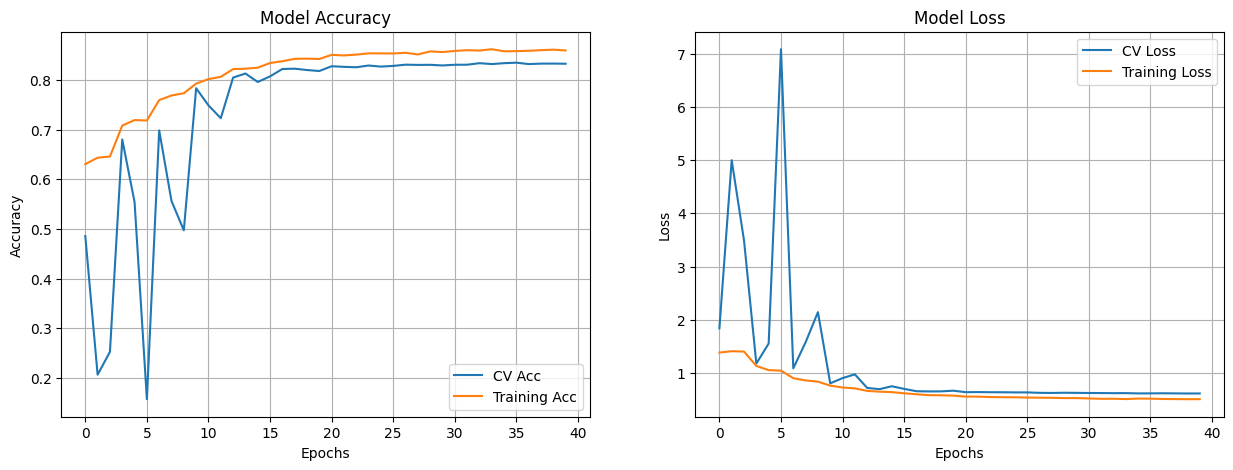

In [ ]:
from tensorflow.keras.models import load_model

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_hist.history['val_accuracy'], label = 'CV Acc')
plt.plot(epochs_hist.history['accuracy'], label = 'Training Acc')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_hist.history['val_loss'], label = 'CV Loss')
plt.plot(epochs_hist.history['loss'], label = 'Training Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import numpy as np

# Function for learning rate scheduling
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * np.exp(-0.1)

# Learning Rate Scheduler callback
lr_scheduler = LearningRateScheduler(scheduler, verbose=1)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Adjusted ReduceLROnPlateau callback for a more conservative learning rate reduction
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, min_delta=0.0001)

# Compile the model with initial learning rate
model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(learning_rate=0.01),  # Initial learning rate
    metrics=['accuracy']
)

# Train the model with the learning rate scheduler, early stopping, and reduce learning rate on plateau callbacks
epochs_hist = model.fit(
    x_train, y_train_cat,
    batch_size=32, epochs=40,
    validation_split=0.2,
    shuffle=True,
    callbacks=[early_stopping, reduce_lr, lr_scheduler]  # Add lr_scheduler to the callbacks
)

# Save the model
model.save("/content/drive/My Drive/Model.h5")


Epoch 1: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 1/40
1250/1250 [==============================] - 15s 9ms/step - loss: 2.3095 - accuracy: 0.3964 - val_loss: 1.5462 - val_accuracy: 0.5441 - lr: 0.0100

Epoch 2: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 2/40
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5308 - accuracy: 0.5579 - val_loss: 1.6010 - val_accuracy: 0.5402 - lr: 0.0100

Epoch 3: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 3/40
1250/1250 [==============================] - 12s 9ms/step - loss: 1.4308 - accuracy: 0.6018 - val_loss: 1.5422 - val_accuracy: 0.5903 - lr: 0.0100

Epoch 4: LearningRateScheduler setting learning rate to 0.009999999776482582.
Epoch 4/40
1250/1250 [==============================] - 12s 9ms/step - loss: 1.3901 - accuracy: 0.6147 - val_loss: 1.3954 - val_accuracy: 0.6074 - lr: 0.0100

Epoch 5: LearningRateScheduler setting learning rat

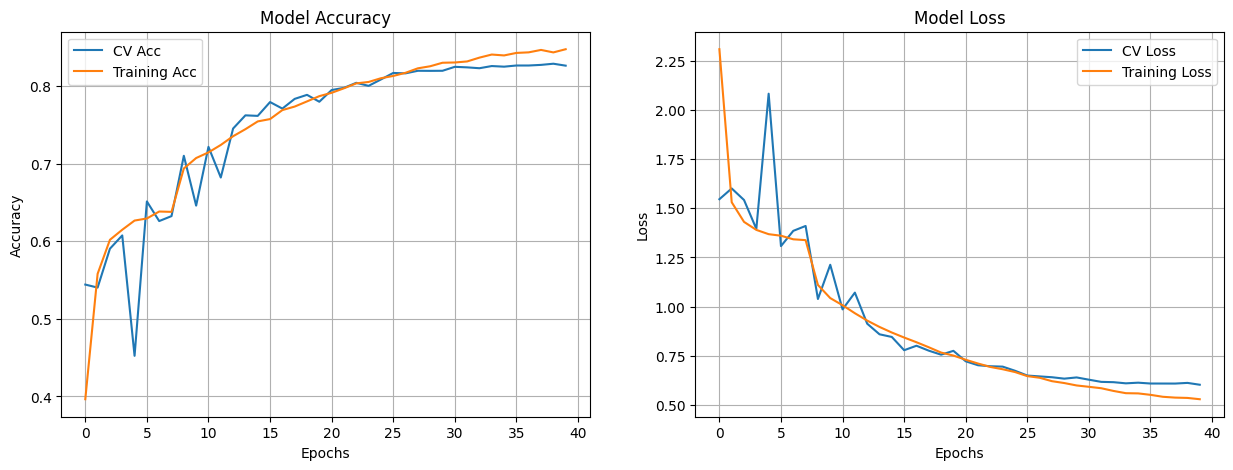

In [ ]:
from tensorflow.keras.models import load_model

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_hist.history['val_accuracy'], label = 'CV Acc')
plt.plot(epochs_hist.history['accuracy'], label = 'Training Acc')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_hist.history['val_loss'], label = 'CV Loss')
plt.plot(epochs_hist.history['loss'], label = 'Training Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()